In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
import os 
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [4]:
def plotImages(images_arr):
    fig,axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


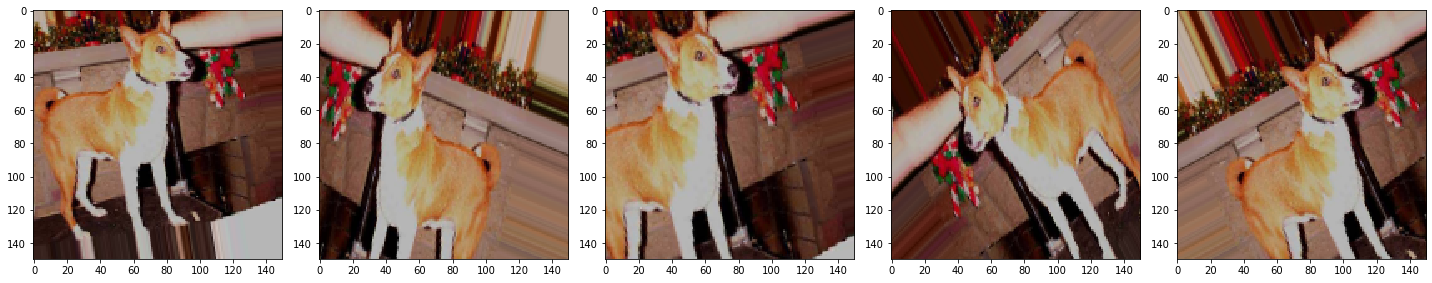

In [8]:
base="D:/Deep Learning/cats_and_dogs_filtered"
train_dir = os.path.join(base,'train')
validation_dir = os.path.join(base,'validation')

train_cats = os.path.join(train_dir,"cats")
train_dogs = os.path.join(train_dir,"dogs")
validation_cats = os.path.join(validation_dir,"cats")
validation_dogs = os.path.join(validation_dir,"dogs")

num_cats_tr =len(os.listdir(train_cats)) 
num_dogs_tr =len(os.listdir(train_dogs))
num_cats_val =len(os.listdir(validation_cats))
num_dogs_val = len(os.listdir(validation_dogs))


total_train = num_cats_tr+num_dogs_tr
total_val = num_cats_val + num_dogs_val

BATCH_SIZE = 32
IMG_SHAPE = 150


train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )


train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode='binary')

val_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=validation_dir,
                                                           shuffle=False,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode='binary')
images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(images)







In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)), # RGB
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Dropout(0.5), # 1/2 of neurons will be turned off randomly
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    
    tf.keras.layers.Dense(2, activation='softmax') #[0, 1] or [1, 0]
    
    ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

EPOCHS = 50

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
    )


Epoch 1/50
63/63 [==============================] - 151s 2s/step - loss: 0.7016 - accuracy: 0.4925 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/50
63/63 [==============================] - 134s 2s/step - loss: 0.6932 - accuracy: 0.5030 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 3/50
63/63 [==============================] - 136s 2s/step - loss: 0.6950 - accuracy: 0.5060 - val_loss: 0.6949 - val_accuracy: 0.5000
Epoch 4/50
63/63 [==============================] - 134s 2s/step - loss: 0.6935 - accuracy: 0.4870 - val_loss: 0.6928 - val_accuracy: 0.5810
Epoch 5/50
63/63 [==============================] - 138s 2s/step - loss: 0.6940 - accuracy: 0.4990 - val_loss: 0.6930 - val_accuracy: 0.4990
Epoch 6/50
63/63 [==============================] - 142s 2s/step - loss: 0.6939 - accuracy: 0.5120 - val_loss: 0.6927 - val_accuracy: 0.5590
Epoch 7/50
63/63 [==============================] - 134s 2s/step - loss: 0.6934 - accuracy: 0.5090 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/50
63

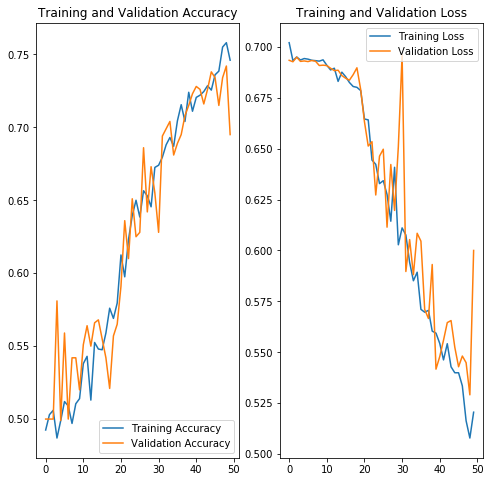

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()